<a class="anchor" id="section-0"></a>
<img src="https://i.imgur.com/lTCPbz0.jpeg" alt='logo puc-sp' width='30%' align='left'>

### Pontifícia Universidade Católica de São Paulo (PUC-SP)

<h1 style=font-size:30px>Calculing Deforestation By Using Satellite Images</h1>


### Bacharelado em Ciência de Dados e Inteligência Artificial

#### Turma: CDIA21-MA

**Professor:** Rooney Ribeiro Albuquerque

**Alunos:**

<table align="left" style=font-size:15px>
<thead>
  <tr>
    <th style="text-align:left;">Nome</th>
    <th style="text-align:left;">RA</th>
    <th></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="text-align:left;">Carlos Eduardo de Oliveira</td>
    <td>RA00297792</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Gustavo Schlieper Tessitore</td>
    <td>RA00297844</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Isaac Higuchi</td>
    <td>RA00306191</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">João Pedro Taves Araujo</td>
    <td>RA00297753</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Lucas Lopes Amorim</td>
    <td>RA00303799</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Thiago de Jesus Carvalho</td>
    <td>RA00297767</td>
    <td></td>
  </tr>
</tbody>
</table>

## Projeto 2:
### Usando dados de satélite para rastrear a pegada humana na floresta amazônica

A cada minuto, o mundo perde uma área de floresta do tamanho de 48 campos de futebol. E o desmatamento na Bacia Amazônica responde pela maior parcela, contribuindo para a redução da biodiversidade, perda de habitat, mudança climática e outros efeitos devastadores. Mas dados melhores sobre a localização do desmatamento e da invasão humana nas florestas podem ajudar os governos e as partes interessadas locais a responder com mais rapidez e eficácia.



Imagens de satélite grosseiras não permitem uma análise detalhada, em especial a aplicação adequada de técnicas de processamento de imagem. Com essas imagens geralmente não conseguimos diferenciar entre causas humanas de perda de florestas e causas naturais. Quando se tem imagens de satélite de alta resolução é possível rastrear as mudanças nas florestas, onde as imagens já demonstraram ser excepcionalmente adequadas para isso.



O que você deve fazer:

Faça a aquisição dos dados e estude com profundidade as informações disponíveis em: https://www.kaggle.com/competitions/planet-understanding-the-amazon-from-space/overview
Revise a página de dados, que inclui informações detalhadas sobre os rótulos e o processo de rotulagem.
Você deve desenvolver um programa para calcular o percentual de floresta densa em uma imagem
Seja livre para fazer esta análise, porém a recomendação é usar segmentação de imagens por cores através do algoritmo k-means.
Tente readequar seu programa para segmentar a imagem em diferentes categorias como floresta, terra para pecuária, estradas, etc.
Isto é um desafio proposto, é importante tentar esta etapa e caso não tenha sucesso informar o motivo
Instruções:

Faça o trabalho em grupos de até 5 pessoas.
O prazo para a entrega do trabalho é 29/11/2022 através de uma tarefa disponibilizada no Microsoft Teams.
As equipes deverão apresentar o trabalho na data da entrega, sendo que a apresentação do trabalho contará como nota individual.
Caso opte por fazer sozinho também será necessário apresentar, porém a apresentação pode ser mais resumida que a das equipes.

### REGIÃO COLETADA

![image.png](attachment:image.png)

In [2]:
import matplotlib.pyplot as plt
from rasterio import plot
import pandas as pd
import numpy as np
import rasterio
import cv2

Visão infra vermelho da região de Porto Velho


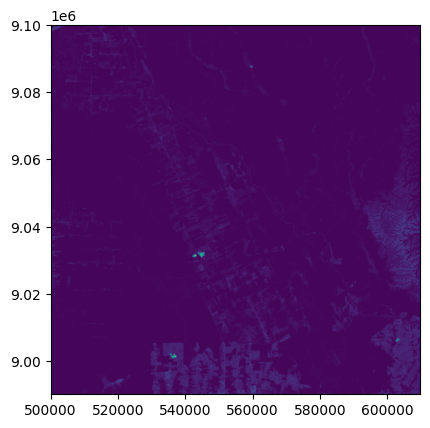

In [3]:
jun_image_path = './data/JUL2021/'
band2 = rasterio.open(jun_image_path + 'T20LNR_20210714T142731_B02_60m.jp2', driver='JP2OpenJPEG')  #green
band3 = rasterio.open(jun_image_path + 'T20LNR_20210714T142731_B03_60m.jp2', driver='JP2OpenJPEG')  #blue
band4 = rasterio.open(jun_image_path + 'T20LNR_20210714T142731_B04_60m.jp2', driver='JP2OpenJPEG')  #red
band8 = rasterio.open(jun_image_path + 'T20LNR_20210714T142731_B8A_60m.jp2', driver='JP2OpenJPEG')  #nir


jun_image_path = './data/JUL2021/'
band2 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B02_60m.jp2', driver='JP2OpenJPEG') #green
band3 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B03_60m.jp2', driver='JP2OpenJPEG') #blue
band4 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B04_60m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B8A_60m.jp2', driver='JP2OpenJPEG') #nir

print("Visão infra vermelho da região de Porto Velho")
plot.show(band4);

Vizualiando as diferentes bandas de cores RGB


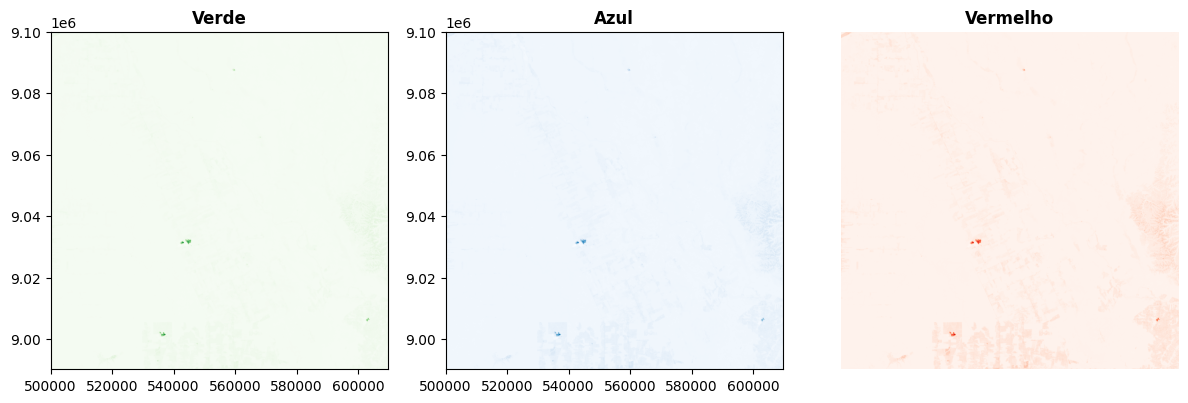

In [4]:
print("Vizualiando as diferentes bandas de cores RGB")
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
plot.show(band2, ax=ax1, cmap='Greens', title='Verde')
plot.show(band3, ax=ax2, cmap='Blues', title='Azul')
plot.show(band4, ax=ax3, cmap='Reds', title='Vermelho')
fig.tight_layout()
plt.axis('off');

### Calculando o NDVI
Calculando o NDVI (Normalized Difference Vegetation Index)
$ \frac{nir - red}{nir + red}$

É um indicador que mede a presença ou ausencia de vegetação verde em imagens de satélite.
O $nir$ representa near infra-red-band, que é a faixa de luz próxima ao infra vermelho.
O $red$ representa a banda de luz vermelha

Agora vamos separar essas bandas e calcular o NDVI para as imagens coletadas

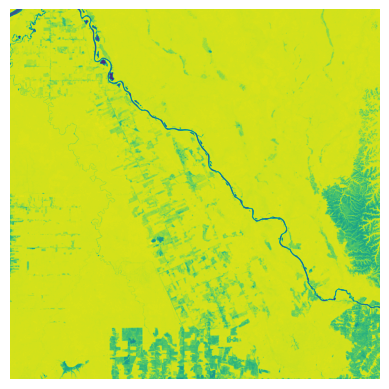

In [6]:
def ndvi_result(red_value, nir_value):
    return (nir_value.astype(float)-red_value.astype(float))/(nir_value+red_value)

def ndvi_plot(red_value, nir_value, save_path=''):
    ndvi = (nir_value.astype(float)-red_value.astype(float))/(nir_value+red_value)

    fig, ax = plt.subplots(1)
    ax.axis('off')
    ax.set_frame_on(False)
    if save_path:
        fig.savefig(save_path)
    plot.show(ndvi, ax=ax)

red = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B04_60m.jp2', driver='JP2OpenJPEG').read() #BAND4
nir = rasterio.open(jun_image_path+'T20LNR_20210714T142731_B8A_60m.jp2', driver='JP2OpenJPEG').read() #BAND8

print("Julho de 2021")
ndvi_map = ndvi_plot(red, nir)

Novembro de 2022


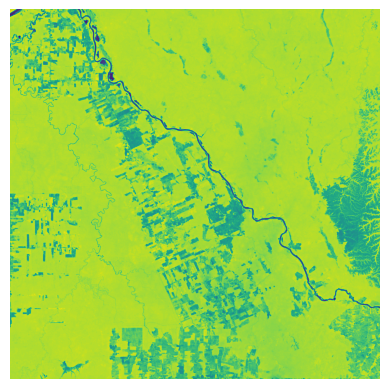

In [7]:
nov_images_path = "./data/NOV2022/"
band2 = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B02_60m.jp2', driver='JP2OpenJPEG') #green
band3 = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B03_60m.jp2', driver='JP2OpenJPEG') #blue
band4 = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B04_60m.jp2', driver='JP2OpenJPEG') #red
band8 = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B8A_60m.jp2', driver='JP2OpenJPEG') #nir

red_nov = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B04_60m.jp2', driver='JP2OpenJPEG').read() #BAND4
nir_nov = rasterio.open(nov_images_path+'T20LNR_20221106T142721_B8A_60m.jp2', driver='JP2OpenJPEG').read() #BAND8

print("Novembro de 2022")
ndvi_plot(red_nov, nir_nov)

# Classificando em área contruida e área de mata

### K-Means com OpenCV

O OpenCV fornece a função cv2.kmeans(amostras, nclusters(K), critérios, numero_tentativas, sinalizadores) para agrupamento de cores.


Os critérios são definidos como tipo, número máximo de iterações e epsilon (precisão).
Os tipos podem ser cv.TERM_CRITERIA_EPS (interrompe a iteração do algoritmo se a precisão especificada, epsilon, for atingida),
cv.TERM_CRITERIA_MAX_ITER (interrompe o algoritmo após o número especificado de iterações, max_iter) ou as duas juntas (interrompe a iteração quando alguma das condições for atendida).


Os sinalizadores podem ser cv.KMEANS_PP_CENTERS ou cv.KMEANS_RANDOM_CENTERS.

In [8]:
# Lendo as imagens
img2021 = cv2.imread('./rasterio_imgs_kmeans/jul2021_SEMBORDA.jpg')
img2022 = cv2.imread('rasterio_imgs_kmeans/nov2022_SEMBORDA.jpg')

#change color to RGB
img2021 = cv2.cvtColor(img2021, cv2.COLOR_BGR2RGB)
img2022 = cv2.cvtColor(img2022, cv2.COLOR_BGR2RGB)


def plot_opencv_kmeans(img, n_clusters):
    # Reshaping the image into a 2D array of pixels and 3 color values (RGB)
    img = img.reshape((-1,3))

    # Convert to float type to use the algorithm
    img = np.float32(img)

    #KMEANS
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
    k = n_clusters
    retval, labels, centers = cv2.kmeans(img, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    # convert data into 8-bit values
    centers = np.uint8(centers)
    centers_segmented_data = centers[labels.flatten()]

    # reshape data into the original image dimensions
    segmented_image = centers_segmented_data.reshape((img2021.shape))

    plt.figure(dpi=150)
    plt.axis('off')
    plt.imshow(segmented_image)

    plt.figure()
    plt.title('Paleta de cores')
    unique_rows = np.unique(centers_segmented_data, axis=0)
    plt.imshow(unique_rows.reshape(1, n_clusters, 3));
    plt.axis('off');

    return centers_segmented_data, unique_rows

Clusters encontrados em Julho de 2021


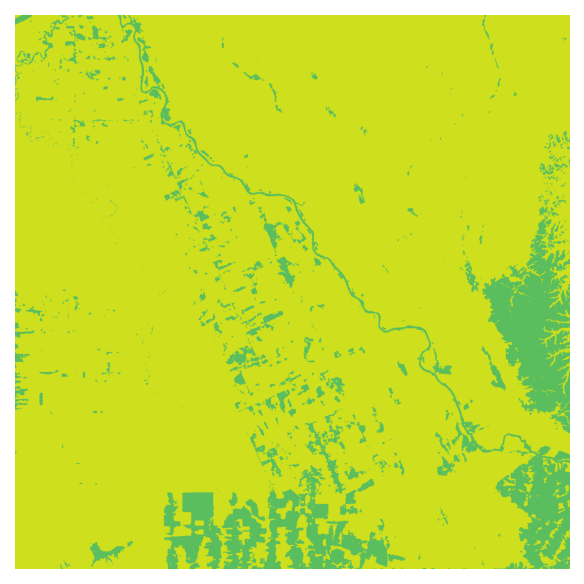

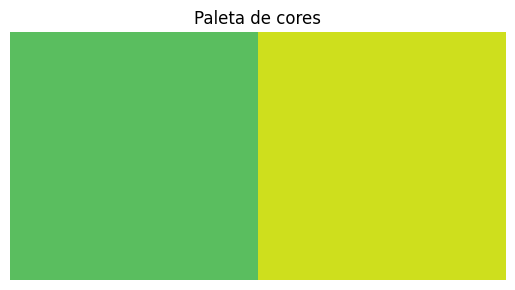

In [12]:
n_clusters = 2

print("Clusters encontrados em Julho de 2021")
s_2021, unique_colors_2021 = plot_opencv_kmeans(img2021, n_clusters)

Clusters encontrados em Novembro de 2022


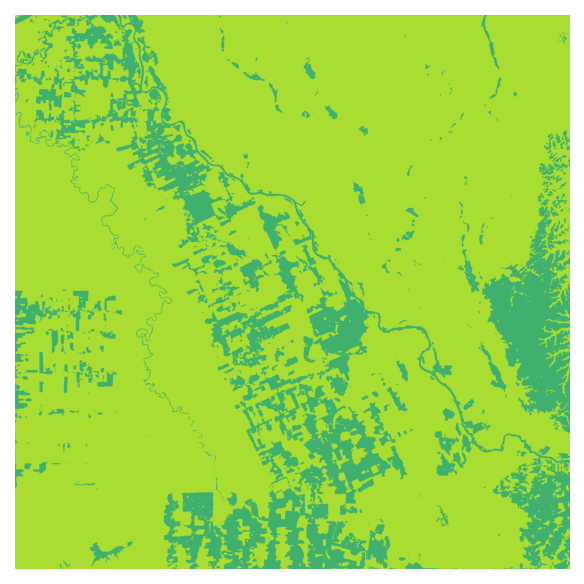

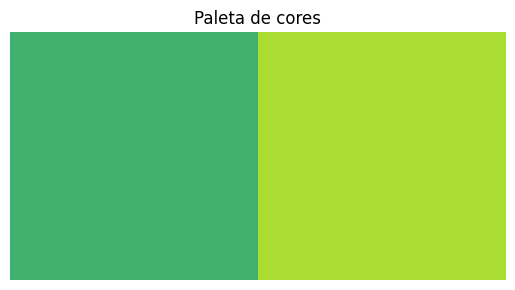

In [13]:
print("Clusters encontrados em Novembro de 2022")
s_2022, unique_colors_2022 = plot_opencv_kmeans(img2022, n_clusters)

Agora para calcular o desmatamento identificamos qual cor representa a área de floresta em ambas as imagens. Depois contamos a quantidade de pixels dessa cor em cada uma das imagens para calcular o percentual de mata

In [19]:
def calculate_percentage_of_colors(array):
    df = pd.DataFrame(array)
    df = df[0].astype(str) + df[1].astype(str) + df[2].astype(str)
    return df.value_counts() / df.shape[0]

print("Julho 2021")
calculate_percentage_of_colors(s_2021)

Julho 2021


20622329    0.881098
9019095     0.118902
dtype: float64

In [20]:
print("Novembro 2022")
calculate_percentage_of_colors(s_2022)

Novembro 2022


16922150    0.807432
64176110    0.192568
dtype: float64